OPTIMIZER


In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

class Optimizer:
    def __init__(self, objective_function, a, b, n_steps, e, minimize:bool):
        self.objective_function = objective_function # Objective Function 
        self.a = float(a) # Lower bound of the range 
        self.b = float(b) # Upper bound of the range
        step = (b-a)/n_steps # Size of each step based on n_steps i.e number of steps
        self.step_size = float(step)
        self.e = float(e) # Value of 'e' for Newton Raphson Method
        self.minimize = minimize # Boolean: True if objective is to minimize, False if objective is to maximize
        self.results = []
        self.logger = []
        self.x_range = []
        self.call = 0

    # Wrapper method to count calls to the objective function
    def call_objective_function(self, x, coefficient=1):
        self.call += 1
        return coefficient*self.objective_function(x)

    def bounding_phase_method(self):
        self.logger.append(f"INITIATING BOUNDING PHASE METHOD, range = ({self.decimal(self.a), self.decimal(self.b)})")

        # Step 1: Choose an initial guess x0 and set k = 0
        x0 = random.uniform(self.a, self.b)
        self.logger.append(f"Initial random guess = {self.decimal(x0)}")
        k = 0
        
        # IF MINIMIZE

        # Step 2: Determine the direction of delta
        if self.minimize:
            delta = self.step_size
            if self.call_objective_function(x0 - abs(delta)) >= self.call_objective_function(x0) >= self.call_objective_function(x0 + abs(delta)):
                delta = abs(delta)  # Delta is positive
            elif self.call_objective_function(x0 - abs(delta)) <= self.call_objective_function(x0) <= self.call_objective_function(x0 + abs(delta)):
                delta = -abs(delta)  # Delta is negative
            else:
                return self.bounding_phase_method()  # Go back to step 1
            
            # Step 3 & 4: Expand the search
            while True:
                self.logger.append(f"Iteration {k+1} : x = {self.decimal(x0)}, delta = {self.decimal(delta)}")  
                self.x_range.append(self.decimal(x0))              
                x_next = x0 + (2**k) * delta
                if self.call_objective_function(x_next) < self.call_objective_function(x0):
                    k += 1
                    x0 = x_next  # Update x0
                else:
                    x_prev = x0 - (2**(k-1)) * delta
                    self.logger.append(f"Final range from Bounding Phase: {(self.decimal(min(x_prev, x_next)), self.decimal(max(x_prev, x_next)))}")
                    return (min(x_prev, x_next), max(x_prev, x_next))  # Return the interval
            
        # IF MAXIMIZE

        # Step 2: Determine the direction of delta
        if not self.minimize:
            delta = self.step_size
            if self.call_objective_function(x0 - abs(delta)) <= self.call_objective_function(x0) <= self.call_objective_function(x0 + abs(delta)):
                delta = abs(delta)  # Delta is positive
            elif self.call_objective_function(x0 - abs(delta)) >= self.call_objective_function(x0) >= self.call_objective_function(x0 + abs(delta)):
                delta = -abs(delta)  # Delta is negative
            else:
                return self.bounding_phase_method()  # Go back to step 1
            
            # Step 3 & 4: Expand the search
            while True:
                self.logger.append(f"Iteration {k+1} : x = {self.decimal(x0)}, delta = {self.decimal(delta)}")
                self.x_range.append(self.decimal(x0))
                x_next = x0 + (2**k) * delta
                if self.call_objective_function(x_next) > self.call_objective_function(x0):
                    k += 1
                    x0 = x_next  # Update x0
                else:
                    x_prev = x0 - (2**(k-1)) * delta
                    self.logger.append(f"Final range from Bounding Phase: {(self.decimal(min(x_prev, x_next)), self.decimal(max(x_prev, x_next)))}")
                    return (min(x_prev, x_next), max(x_prev, x_next))  # Return the interval

    def newton_raphson_method(self, c, d):
        self.logger.append(f"INITIATING NEWTON RAPHSON METHOD, range = ({self.decimal(c), self.decimal(d)})")

        # Step 1: Choose an initial guess x1 and set k = 1
        x1 = random.uniform(c, d)
        self.logger.append(f"Initial random guess = {self.decimal(x1)}")
        k = 1

        while True:
            self.logger.append(f"Iteration {k} : x = {self.decimal(x1)}")
            self.x_range.append(self.decimal(x1))
            # Compute f'(xk) and f''(xk)
            f_prime = self.derivative(x1)
            f_double_prime = self.second_derivative(x1)

            # Check for zero or near-zero second derivative
            if abs(f_double_prime) < 1e-10:
                raise ValueError(f"Second derivative for x={x1} is too small({f_double_prime}) or zero, causing division by zero.")

            # Step 3: Calculate xk+1
            x_next = x1 - f_prime / f_double_prime

            # Step 4: Check termination condition
            if abs(self.derivative(x_next)) < self.e:
                return (x_next, self.call_objective_function(x_next))

            # Update x1 and k
            x1 = x_next
            k += 1

    # Helper Function for derivative calculation
    def derivative(self, x, h=1e-5):
        h = float(h)
        return (self.call_objective_function(x + h) - self.call_objective_function(x - h)) / (2 * h)

    # Helper Function for double derivative calculation
    def second_derivative(self, x, h=1e-5):
        h = float(h)
        return (self.call_objective_function(x + h) - 2 * self.call_objective_function(x) + self.call_objective_function(x - h)) / (h**2)

    def optimize(self):
        # Step 1: Perform bounding phase method to get a new range (x, y)
        x, y = self.bounding_phase_method()
        
        # Step 2: Perform Newton-Raphson method to find the optimized value
        result = self.newton_raphson_method(x, y)

        # Final Result:
        self.logger.append(f"->Final result : {result}")
        return result
    
    # Helper Function to round decimals
    def decimal(self, x):
        return round(x,3)        

    # Helper Function to log the iterations 
    def log(self):
        return '\n'.join(self.logger)


OBJECTIVE FUNCTIONS

In [3]:
import math

# (2x-5)^4 - (x^2 - 1)^3 
# MAXIMIZE
# (-10,0)
def function_01(x):
    result = (2*x - 5)**4 - (x**2 - 1)**3
    return result

# 8 + x^3 - 2*x - 2*(e^x) 
# MAXIMIZE
# (-2,1)
def function_02(x):
    result = 8 + x**3 - 2*x - 2*math.exp(x)
    return result

# 4*x*sinx
# MAXIMIZE
# (0.5,pi)
def function_03(x):
    result = 4 * x * math.sin(x)
    return result

# 2*(x-3)^2 + e^(0.5*x^2)
# MINIMIZE
# (-2,3)
def function_04(x):
    result = 2*(x-3)**2 + math.exp(0.5*x**2)
    return result

# x^2 - 10 * e^(0.1x)
# MINIMIZE
# (-6,6)
def function_05(x):
    result = x**2 - 10 * math.exp(0.1*x)
    return result

# 20*sinx - 15*(x^2) 
# MAXIMIZE
# (-4,4)
def function_06(x):
    result = 20 * math.sin(x) - 15 * (x**2)
    return result


FUNCTION 1 : (2x-5)^4 - (x^2 - 1)^3

In [31]:
# function_01
n_step_list = [5,10,15,20,25]
e_list = [0.01,0.001]
results = []
for n_step in n_step_list:
    for e in e_list:
        optim = Optimizer(objective_function=function_01,a=-10,b=0,n_steps=n_step,e=e,minimize=False)
        a,b = optim.optimize()
        calls = optim.call
        results.append([n_step, e, a, b, calls])        
print("----------------------------")
print(optim.log())
print("----------------------------")
results_df = pd.DataFrame(results, columns=['# of steps', 'e', 'x_MAX', 'Y_MAX', 'Function calls'])        

----------------------------
INITIATING BOUNDING PHASE METHOD, range = ((-10.0, 0.0))
Initial random guess = -0.987
Iteration 1 : x = -0.987, delta = -0.4
Iteration 2 : x = -1.387, delta = -0.4
Iteration 3 : x = -2.187, delta = -0.4
Iteration 4 : x = -3.787, delta = -0.4
Final range from Bounding Phase: (-6.987, -2.187)
INITIATING NEWTON RAPHSON METHOD, range = ((-6.987, -2.187))
Initial random guess = -5.197
Iteration 1 : x = -5.197
Iteration 2 : x = -6.044
Iteration 3 : x = -5.807
Iteration 4 : x = -5.776
Iteration 5 : x = -5.775
->Final result : (-5.775067547427276, 41165.614407058725)
----------------------------


In [32]:
results_df

,# of steps,e,x_MAX,Y_MAX,Function calls
0,5,0.010,-5.775068,41165.614407,52
1,5,0.001,-5.775068,41165.614407,43
2,10,0.010,-5.775068,41165.614407,54
3,10,0.001,-5.775068,41165.614407,73
4,15,0.010,-5.775068,41165.614407,41
5,15,0.001,-5.775068,41165.614407,38
6,20,0.010,-5.775068,41165.614407,59
7,20,0.001,-5.775068,41165.614407,229
8,25,0.010,-5.775068,41165.614407,42
9,25,0.001,-5.775068,41165.614407,49


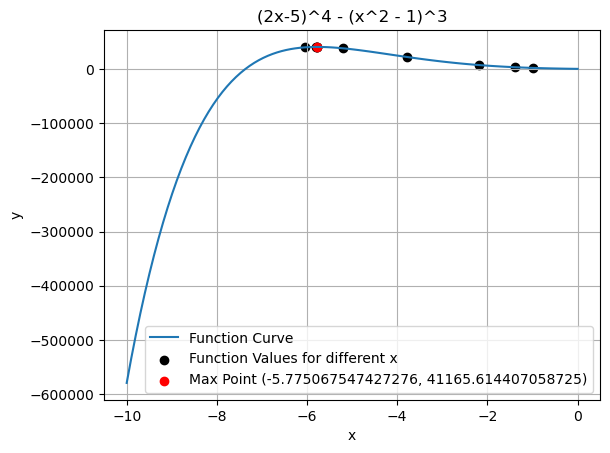

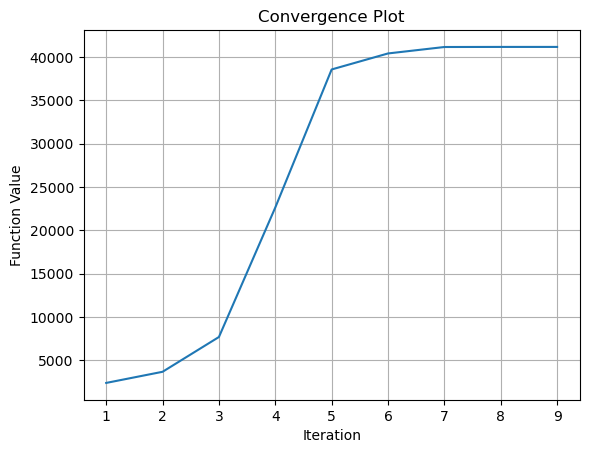

In [35]:
x_range = optim.x_range
y_range = [function_01(x) for x in x_range]
x_max = a
y_max = b

x = np.linspace(-10, 0, 100)
y = (2*x - 5)**4 - (x**2 - 1)**3

plt.plot(x, y)
plt.scatter(x_range, y_range, color='black', label='Function Values for different x')
plt.scatter(x_max, y_max, color='red', label='Max Point')  # Marking x_max and y_max with red color
plt.xlabel('x')
plt.ylabel('y')
plt.title('(2x-5)^4 - (x^2 - 1)^3')
plt.grid(True)
plt.legend(['Function Curve', 'Function Values for different x', f'Max Point ({x_max}, {y_max})'])
plt.show()

plt.plot(range(1, len(y_range) + 1), y_range)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()

FUNCTION 2 : 8 + x^3 - 2*x - 2*(e^x)

In [36]:
n_step_list = [5, 10, 15, 20, 25]
e_list = [0.01, 0.001]
results = []

for n_step in n_step_list:
    for e in e_list:
        optim = Optimizer(objective_function=function_02, a=-2, b=1, n_steps=n_step, e=e, minimize=False)
        a, b = optim.optimize()
        calls = optim.call
        results.append([n_step, e, a, b, calls])

print("----------------------------")
print(optim.log())
print("----------------------------")
results_df = pd.DataFrame(results, columns=['# of steps', 'e', 'x_MAX', 'Y_MAX', 'Function calls'])

----------------------------
INITIATING BOUNDING PHASE METHOD, range = ((-2.0, 1.0))
Initial random guess = 0.203
Iteration 1 : x = 0.203, delta = -0.12
Iteration 2 : x = 0.083, delta = -0.12
Iteration 3 : x = -0.157, delta = -0.12
Iteration 4 : x = -0.637, delta = -0.12
Final range from Bounding Phase: (-1.597, -0.157)
INITIATING NEWTON RAPHSON METHOD, range = ((-1.597, -0.157))
Initial random guess = -1.196
Iteration 1 : x = -1.196
Iteration 2 : x = -0.979
->Final result : (-0.9602953673455673, 8.269478234531267)
----------------------------


In [37]:
results_df

,# of steps,e,x_MAX,Y_MAX,Function calls
0,5,0.010,-0.960232,8.269478,33
1,5,0.001,-0.960151,8.269478,31
2,10,0.010,-0.960252,8.269478,24
3,10,0.001,-0.960152,8.269478,26
4,15,0.010,-0.960501,8.269478,35
5,15,0.001,-0.960151,8.269478,33
6,20,0.010,-0.961590,8.269472,26
7,20,0.001,-0.960153,8.269478,42
8,25,0.010,-0.960816,8.269477,21
9,25,0.001,-0.960295,8.269478,28


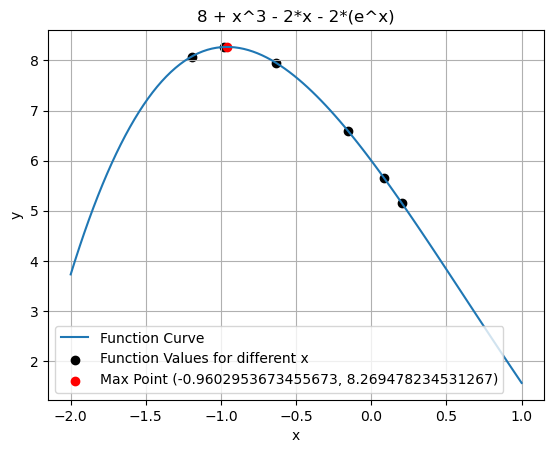

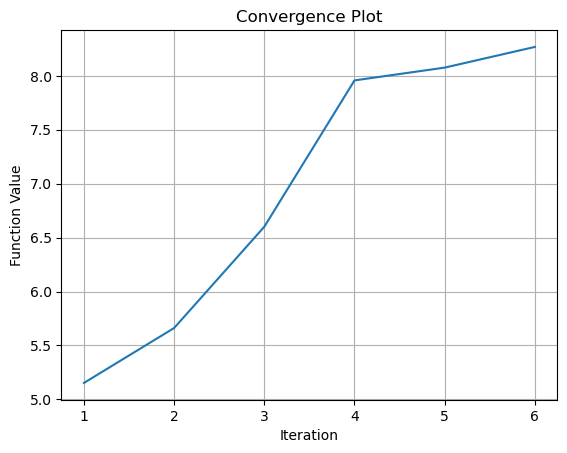

In [38]:
x_range = optim.x_range
y_range = [function_02(x) for x in x_range]
x_max = a
y_max = b

x = np.linspace(-2, 1, 100)
y = 8 + x**3 - 2*x - 2*np.exp(x)

plt.plot(x, y)
plt.scatter(x_range, y_range, color='black', label='Function Values for different x')
plt.scatter(x_max, y_max, color='red', label='Max Point')  # Marking x_max and y_max with red color
plt.xlabel('x')
plt.ylabel('y')
plt.title('8 + x^3 - 2*x - 2*(e^x)')
plt.grid(True)
plt.legend(['Function Curve', 'Function Values for different x', f'Max Point ({x_max}, {y_max})'])
plt.show()

plt.plot(range(1, len(y_range) + 1), y_range)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()

FUNCTION 3 : 4*x*sinx

In [39]:
n_step_list = [5, 10, 15, 20, 25]
e_list = [0.01, 0.001]
results = []

for n_step in n_step_list:
    for e in e_list:
        optim = Optimizer(objective_function=function_03, a=0.5, b=math.pi, n_steps=n_step, e=e, minimize=False)
        a, b = optim.optimize()
        calls = optim.call
        results.append([n_step, e, a, b, calls])

print("----------------------------")
print(optim.log())
print("----------------------------")
results_df = pd.DataFrame(results, columns=['# of steps', 'e', 'x_MAX', 'Y_MAX', 'Function calls'])

----------------------------
INITIATING BOUNDING PHASE METHOD, range = ((0.5, 3.142))
Initial random guess = 1.211
Iteration 1 : x = 1.211, delta = 0.106
Iteration 2 : x = 1.316, delta = 0.106
Iteration 3 : x = 1.528, delta = 0.106
Iteration 4 : x = 1.95, delta = 0.106
Final range from Bounding Phase: (1.528, 2.796)
INITIATING NEWTON RAPHSON METHOD, range = ((1.528, 2.796))
Initial random guess = 2.014
Iteration 1 : x = 2.014
->Final result : (2.028836838917614, 7.278822930886667)
----------------------------


In [40]:
results_df

,# of steps,e,x_MAX,Y_MAX,Function calls
0,5,0.010,2.028764,7.278823,53
1,5,0.001,2.028840,7.278823,24
2,10,0.010,2.028850,7.278823,24
3,10,0.001,2.028758,7.278823,31
4,15,0.010,2.028807,7.278823,33
5,15,0.001,2.028828,7.278823,24
6,20,0.010,2.028892,7.278823,17
7,20,0.001,2.028765,7.278823,22
8,25,0.010,2.028818,7.278823,35
9,25,0.001,2.028837,7.278823,19


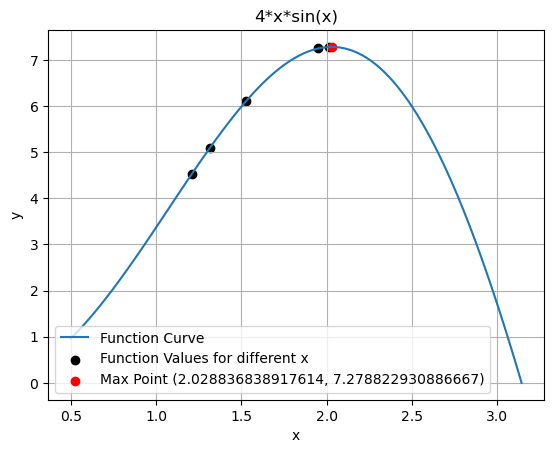

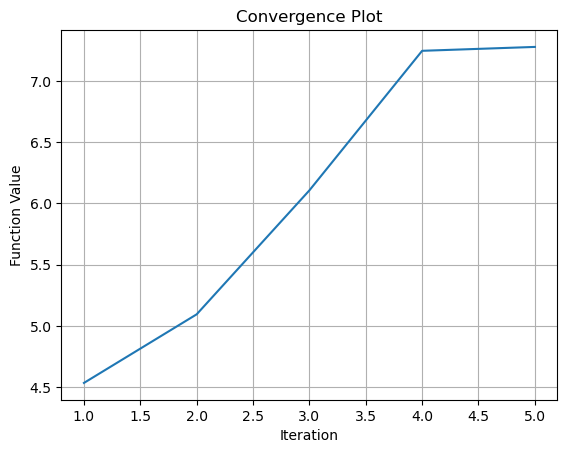

In [41]:
x_range = optim.x_range
y_range = [function_03(x) for x in x_range]
x_max = a
y_max = b

x = np.linspace(0.5, math.pi, 100)
y = 4 * x * np.sin(x)

plt.plot(x, y)
plt.scatter(x_range, y_range, color='black', label='Function Values for different x')
plt.scatter(x_max, y_max, color='red', label='Max Point')  # Marking x_max and y_max with red color
plt.xlabel('x')
plt.ylabel('y')
plt.title('4*x*sin(x)')
plt.grid(True)
plt.legend(['Function Curve', 'Function Values for different x', f'Max Point ({x_max}, {y_max})'])
plt.show()


plt.plot(range(1, len(y_range) + 1), y_range)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()

FUNCTION 4 : 2*(x-3)^2 + e^(0.5*x^2)

In [42]:
n_step_list = [5, 10, 15, 20, 25]
e_list = [0.01, 0.001]
results = []

for n_step in n_step_list:
    for e in e_list:
        optim = Optimizer(objective_function=function_04, a=-2, b=3, n_steps=n_step, e=e, minimize=True)
        a, b = optim.optimize()
        calls = optim.call
        results.append([n_step, e, a, b, calls])

print("----------------------------")
print(optim.log())
print("----------------------------")
results_df = pd.DataFrame(results, columns=['# of steps', 'e', 'x_MIN', 'Y_MIN', 'Function calls'])

----------------------------
INITIATING BOUNDING PHASE METHOD, range = ((-2.0, 3.0))
Initial random guess = 2.098
Iteration 1 : x = 2.098, delta = -0.2
Iteration 2 : x = 1.898, delta = -0.2
Iteration 3 : x = 1.498, delta = -0.2
Final range from Bounding Phase: (0.698, 1.898)
INITIATING NEWTON RAPHSON METHOD, range = ((0.698, 1.898))
Initial random guess = 1.762
Iteration 1 : x = 1.762
Iteration 2 : x = 1.618
Iteration 3 : x = 1.591
->Final result : (1.5907175453488038, 7.515924153083992)
----------------------------


In [43]:
results_df

,# of steps,e,x_MIN,Y_MIN,Function calls
0,5,0.010,1.590749,7.515924,45
1,5,0.001,1.590731,7.515924,41
2,10,0.010,1.590843,7.515924,124
3,10,0.001,1.590717,7.515924,54
4,15,0.010,1.591077,7.515925,75
5,15,0.001,1.590717,7.515924,75
6,20,0.010,1.590727,7.515924,29
7,20,0.001,1.590752,7.515924,40
8,25,0.010,1.591303,7.515927,38
9,25,0.001,1.590718,7.515924,33


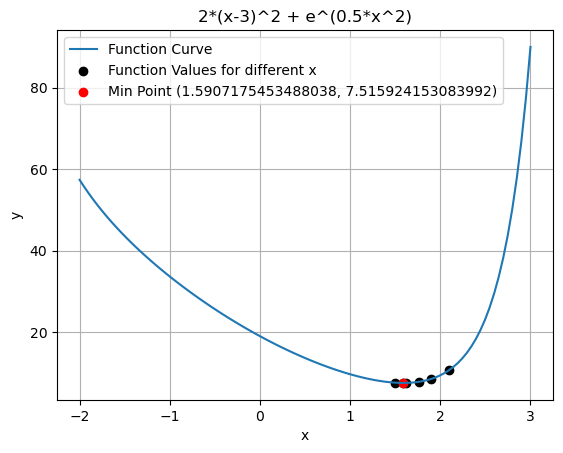

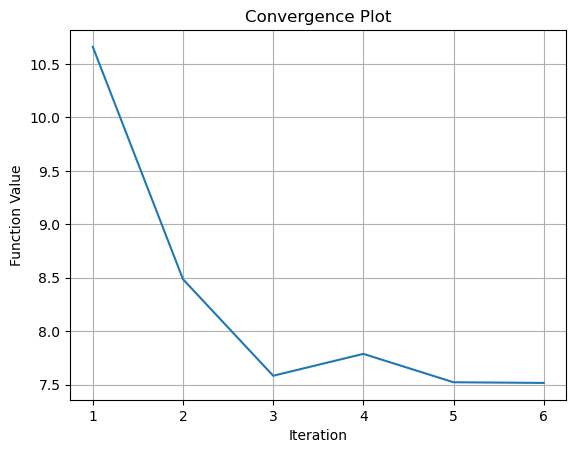

In [44]:
x_range = optim.x_range
y_range = [function_04(x) for x in x_range]
x_min = a
y_min = b

x = np.linspace(-2, 3, 100)
y = 2*(x-3)**2 + np.exp(0.5*x**2)

plt.plot(x, y)
plt.scatter(x_range, y_range, color='black', label='Function Values for different x')
plt.scatter(x_min, y_min, color='red', label='Min Point')  # Marking x_min and y_min with red color
plt.xlabel('x')
plt.ylabel('y')
plt.title('2*(x-3)^2 + e^(0.5*x^2)')
plt.grid(True)
plt.legend(['Function Curve', 'Function Values for different x', f'Min Point ({x_min}, {y_min})'])
plt.show()

plt.plot(range(1, len(y_range) + 1), y_range)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()

FUNCTION 5 : x^2 - 10 * e^(0.1x)

In [4]:
n_step_list = [5, 10, 15, 20, 25]
e_list = [0.01, 0.001]
results = []

for n_step in n_step_list:
    for e in e_list:
        optim = Optimizer(objective_function=function_05, a=-6, b=6, n_steps=n_step, e=e, minimize=True)
        a, b = optim.optimize()
        calls = optim.call
        results.append([n_step, e, a, b, calls])

print("----------------------------")
print(optim.log())
print("----------------------------")
results_df = pd.DataFrame(results, columns=['# of steps', 'e', 'x_MIN', 'Y_MIN', 'Function calls'])

----------------------------
INITIATING BOUNDING PHASE METHOD, range = ((-6.0, 6.0))
Initial random guess = -1.591
Iteration 1 : x = -1.591, delta = 0.48
Iteration 2 : x = -1.111, delta = 0.48
Iteration 3 : x = -0.151, delta = 0.48
Final range from Bounding Phase: (-1.111, 1.769)
INITIATING NEWTON RAPHSON METHOD, range = ((-1.111, 1.769))
Initial random guess = 0.652
Iteration 1 : x = 0.652
->Final result : (0.5270169353231985, -10.263404638352258)
----------------------------


In [5]:
results_df

,# of steps,e,x_MIN,Y_MIN,Function calls
0,5,0.010,0.527059,-10.263405,22
1,5,0.001,0.527051,-10.263405,22
2,10,0.010,0.527060,-10.263405,22
3,10,0.001,0.527060,-10.263405,26
4,15,0.010,0.523761,-10.263394,24
5,15,0.001,0.526622,-10.263404,15
6,20,0.010,0.524935,-10.263400,26
7,20,0.001,0.527059,-10.263405,28
8,25,0.010,0.525372,-10.263402,21
9,25,0.001,0.527017,-10.263405,17


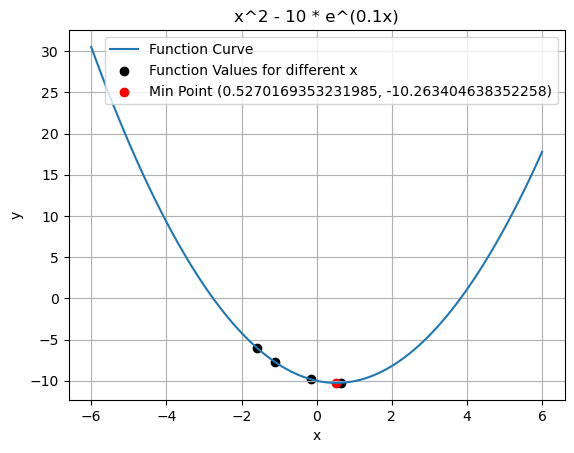

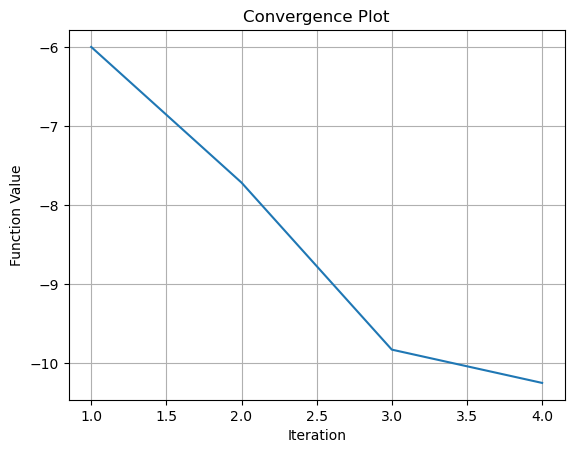

In [6]:
x_range = optim.x_range
y_range = [function_05(x) for x in x_range]
x_min = a
y_min = b

x = np.linspace(-6, 6, 100)
y = x**2 - 10 * np.exp(0.1*x)

plt.plot(x, y)
plt.scatter(x_range, y_range, color='black', label='Function Values for different x')
plt.scatter(x_min, y_min, color='red', label='Min Point')  # Marking x_min and y_min with red color
plt.xlabel('x')
plt.ylabel('y')
plt.title('x^2 - 10 * e^(0.1x)')
plt.grid(True)
plt.legend(['Function Curve', 'Function Values for different x', f'Min Point ({x_min}, {y_min})'])
plt.show()

plt.plot(range(1, len(y_range) + 1), y_range)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()

FUNCTION 6 : 20*sinx - 15*(x^2)

In [7]:
n_step_list = [5, 10, 15, 20, 25]
e_list = [0.01, 0.001]
results = []

for n_step in n_step_list:
    for e in e_list:
        optim = Optimizer(objective_function=function_06, a=-4, b=4, n_steps=n_step, e=e, minimize=False)
        a, b = optim.optimize()
        calls = optim.call
        results.append([n_step, e, a, b, calls])

print("----------------------------")
print(optim.log())
print("----------------------------")
results_df = pd.DataFrame(results, columns=['# of steps', 'e', 'x_MAX', 'Y_MAX', 'Function calls'])

----------------------------
INITIATING BOUNDING PHASE METHOD, range = ((-4.0, 4.0))
Initial random guess = -1.211
Iteration 1 : x = -1.211, delta = 0.32
Iteration 2 : x = -0.891, delta = 0.32
Iteration 3 : x = -0.251, delta = 0.32
Iteration 4 : x = 1.029, delta = 0.32
Final range from Bounding Phase: (-0.251, 3.589)
INITIATING NEWTON RAPHSON METHOD, range = ((-0.251, 3.589))
Initial random guess = 2.275
Iteration 1 : x = 2.275
Iteration 2 : x = 0.48
Iteration 3 : x = 0.565
->Final result : (0.5635697018738854, 5.919982972275752)
----------------------------


In [8]:
results_df

,# of steps,e,x_MAX,Y_MAX,Function calls
0,5,0.010,0.563569,5.919983,39
1,5,0.001,0.563569,5.919983,34
2,10,0.010,0.563589,5.919983,47
3,10,0.001,0.563569,5.919983,31
4,15,0.010,0.563799,5.919982,22
5,15,0.001,0.563569,5.919983,31
6,20,0.010,0.563569,5.919983,35
7,20,0.001,0.563580,5.919983,26
8,25,0.010,0.563569,5.919983,56
9,25,0.001,0.563570,5.919983,33


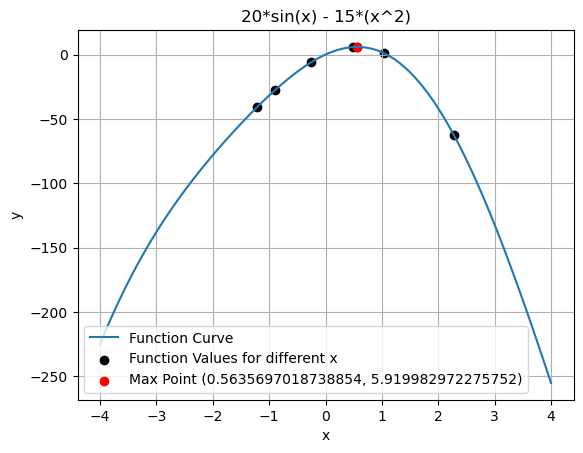

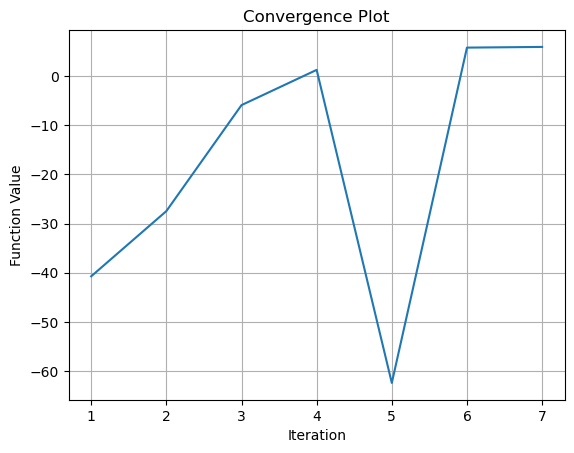

In [9]:
x_range = optim.x_range
y_range = [function_06(x) for x in x_range]
x_max = a
y_max = b

x = np.linspace(-4, 4, 100)
y = 20 * np.sin(x) - 15 * (x**2)

plt.plot(x, y)
plt.scatter(x_range, y_range, color='black', label='Function Values for different x')
plt.scatter(x_max, y_max, color='red', label='Max Point')  # Marking x_max and y_max with red color
plt.xlabel('x')
plt.ylabel('y')
plt.title('20*sin(x) - 15*(x^2)')
plt.grid(True)
plt.legend(['Function Curve', 'Function Values for different x', f'Max Point ({x_max}, {y_max})'])
plt.show()

plt.plot(range(1, len(y_range) + 1), y_range)
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()